<a href="https://colab.research.google.com/github/THANNAGA/Reset-Networks/blob/main/Attention-based%20function%20space.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fun with Attention

In [ ]:
'''Simple attention module'''
# useful blog post for getting dimensions right for attention: https://jalammar.github.io/illustrated-transformer/
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
import math

# first try without batch dimension - learned how to declare parameters for arbitrary matrices in pytorch
class AttentionModule(nn.Module):
    def __init__(self, n=10, dim=20):
        super().__init__()
        #self.Q = nn.linear(indim, outdim, bias=False)
        #self.K = nn.linear(indim, outdim, bias=False)
        #self.V = nn.linear(indim, outdim, bias=False)
        self.Q = torch.nn.Parameter(torch.rand(n, dim))
        self.K = torch.nn.Parameter(torch.rand(n, dim))
        self.V = torch.nn.Parameter(torch.rand(n, dim))

    def forward(self, x):
        #q = self.Q(x)
        #k = self.K(x)
        #v = self.V(x)
        print ('x.size()', x.size())
        norm = x.size(1)**0.5;print ('norm', norm)
        q = torch.mm(x, self.Q);print ('q.size()', q.size())
        k = torch.mm(x, self.K);print ('k.size()', k.size())
        v = torch.mm(x, self.V);print ('v.size()', v.size())
        z = torch.mm(q, k.T)/norm;print ('normalized', z.size())
        z = F.softmax(z, dim=1);print ('softmaxed', z.size())
        z = torch.mm(z, v);print ('final z', z.size())
        return z

# second try, with batch dimension - learned something about torch.einsum
# also with embeddings - learned about how they are done in transformers, and about torch.repeat
#https://pytorch.org/docs/stable/generated/torch.einsum.html
class Attention2(nn.Module):
    def __init__(self, n=10, dim=20):
        super().__init__()
        self.Q = nn.Linear(n, dim, bias=False)
        self.K = nn.Linear(n, dim, bias=False)
        self.V = nn.Linear(n, dim, bias=False)

    def forward(self, x, e=None):
        if e is None:
          e = torch.zeros_like(x)
        x = x + e
        print ('x.size()', x.size())
        norm = x.size(-1)**0.5;print ('norm', norm)
        q = self.Q(x);print ('q.size()', q.size())
        k = self.K(x);print ('k.size()', k.size())
        v = self.V(x);print ('v.size()', v.size())
        z = torch.einsum('bij,bkj->bik', q, k)/norm;print ('normalized', z.size())
        z = F.softmax(z, dim=-1);print ('softmaxed', z.size())
        z = torch.einsum('bij,bjk->bik', z, v);print ('final z', z.size())
        return z

## Visualization

In [ ]:
!pip install ipywidgets
from ipywidgets import interact
#Basic ipywidgets interact would generate UI from the function
def f(x):
    return x
https://towardsdatascience.com/5-interesting-jupyter-interactive-visualization-extensions-ab030c8d0eb9

##Embeddings

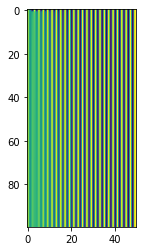

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#Generate embeddings as a matrix
#https://arxiv.org/pdf/2010.04903.pdf
def GenerateEmbeddings(n=10, lseq=3, show=True):
  embeddings = np.zeros((lseq, n))
  for i in np.arange(lseq):
    for j in np.arange(n//2):
      embeddings[i, 2*j] = np.sin((i/10000)**(2*j/n))
      embeddings[i, 2*j +1] = np.cos((i/10000)**(2*j/n))
  if show:
    plt.imshow(embeddings);plt.show()
  return embeddings
embeddings = GenerateEmbeddings(n=50, lseq=100, show=True)

In [ ]:
#test
def test():
    nbatch=2; lseq=3; n=10; dim=100
    #net = AttentionModule(n=n, dim=dim)
    net = Attention2(n=n, dim=dim)
    x = torch.randn(nbatch, lseq, n)
    embeddings = torch.randn(1, lseq, n).repeat(nbatch, 1, 1)
    print ('np.shape(embeddings)', np.shape(embeddings))
    z = net(x, e=embeddings)
    print ('np.shape(output)', np.shape(z))
    model_total_params = sum(p.numel() for p in net.parameters())
    print('==> Model built. The model has ',model_total_params,'total parameters')   
test()

np.shape(embeddings) torch.Size([2, 3, 10])
x.size() torch.Size([2, 3, 10])
norm 3.1622776601683795
q.size() torch.Size([2, 3, 100])
k.size() torch.Size([2, 3, 100])
v.size() torch.Size([2, 3, 100])
normalized torch.Size([2, 3, 3])
softmaxed torch.Size([2, 3, 3])
final z torch.Size([2, 3, 100])
np.shape(output) torch.Size([2, 3, 100])
==> Model built. The model has  3000 total parameters
